# Customer Segmentation (Unsupervised Learning)
We analyze the sales data of a wholesale distributor. It includes the customers' annual spending in monetary units on different product categories.

The datset can be found on the UCI Machine Learning Repository [here](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers).

The data includes the following information (attributes or features): 

*   **FRESH**: annual spending on fresh products
*   **MILK**: annual spending on milk products
*   **GROCERY**: annual spending on grocery products
*   **FROZEN**: annual spending on frozen products 
*   **DETERGENTS_PAPER**: annual spending on detergents and paper products 
*   **DELICATESSEN**: annual spending on and delicatessen products 
*   **CHANNEL**: customers channel - Wholesale (Hotel/Restaurant/Cafe) or Retail channel
*   **REGION**: customers region (Lisnon, Oporto, Other) 

We do exclude the features 'Channel' and 'Region' and focus instead on the six product categories recorded for the customers.

One goal is to best describe the variation in the different types of customers, which might help the distributor to optimize marketing and sales. 



In [0]:
#Import libraries 
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline

In [0]:
#Download the dataset 'Wholesale customers data.csv' from UCI (https://archive.ics.uci.edu/ml/machine-learning-databases/00292/
#Upload the file from local 
from google.colab import files
uploaded = files.upload()

Saving Wholesale customers data.csv to Wholesale customers data.csv


In [0]:
#Read the data; drop Region and Channel
try:
    data = pd.read_csv('Wholesale customers data.csv')
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has (samples,features):",data.shape)
except:
    print("Dataset could not be loaded. Is the dataset missing?")

data.head()

Wholesale customers dataset has (samples,features): (440, 6)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [0]:
#Data Exploration
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [0]:
#Selecting Samples: Select three indices of your choice you wish to sample from the dataset
indices = [22, 50, 145]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:",'\n',samples)

Chosen samples of wholesale customers dataset: 
    Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  31276  1917     4469    9408              2381        4334
1   6269  1095     1980    3860               609        2162
2  22039  8384    34792      42             12591        4430


In [0]:
#Feature Relevance
#Question: Is there a relation between the categories, i.e. purchasing one category determines the purchase of another category?
#Solution: Train a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

def predict_feature(feature):
    #Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop([feature], axis=1)
    
    #Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[feature], test_size=0.25, random_state=40)
    
    #Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=40).fit(X_train, y_train)
    
    #Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    
    #Score = R^2 (Coefficient of determination); between 0 and 1, with 1 being a perfect fit. A negative R^2 implies the model fails to fit the data.
    print("Score and Feature:", score, feature)
    
for feature in data.columns.values:
    predict_feature(feature)    

Score and Feature: -0.3342937312148245 Fresh
Score and Feature: -0.19897129897628907 Milk
Score and Feature: 0.8078102581018215 Grocery
Score and Feature: -0.21531075777193265 Frozen
Score and Feature: 0.7845687816277183 Detergents_Paper
Score and Feature: -3.36372145464975 Delicassen


***Interpretation***

The two features **Grocery** with a score of 81% and **Detergents_Paper** with a score of 78% are the ones that could be predicted by the others. So these two could be dropped. The other ones show even negative scores, indicating that these ones could not be predicted by the others.

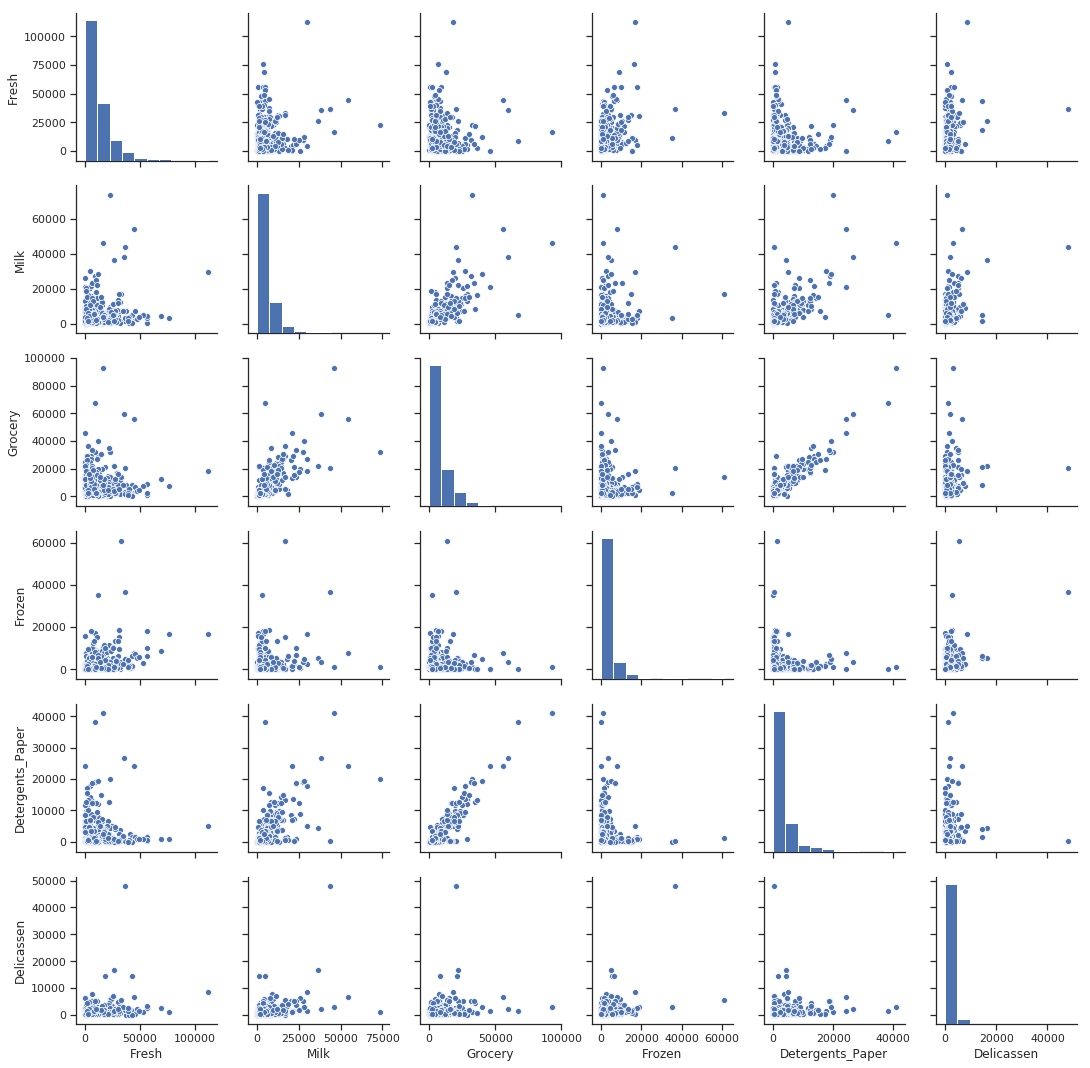

In [0]:
#Visualize Feature Distributions: Produce a scatter matrix for each pair of features in the data
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(data)

**Interpretation**

There are some correlations visible in the scatter plots. The most visible one is between Grocery and Detergents_Paper. Additionally the following combinations do show as a correlation: Milk and Grocery, Milk and Detergents_Paper. For the other pairs of features, there seems to be almost no correlation.

The two features Grocery and Detergents_Paper happen to be the most predictable ones given all other features. This confirms the results from the regressions above. Those features for which the RegressionTrees produced positive scores are also those which seem to be highly correlated.

The distributions for all features does not appear to be normal. All distributions have a spike at very low values and then drop quickly. It looks like a log-normal distribution.

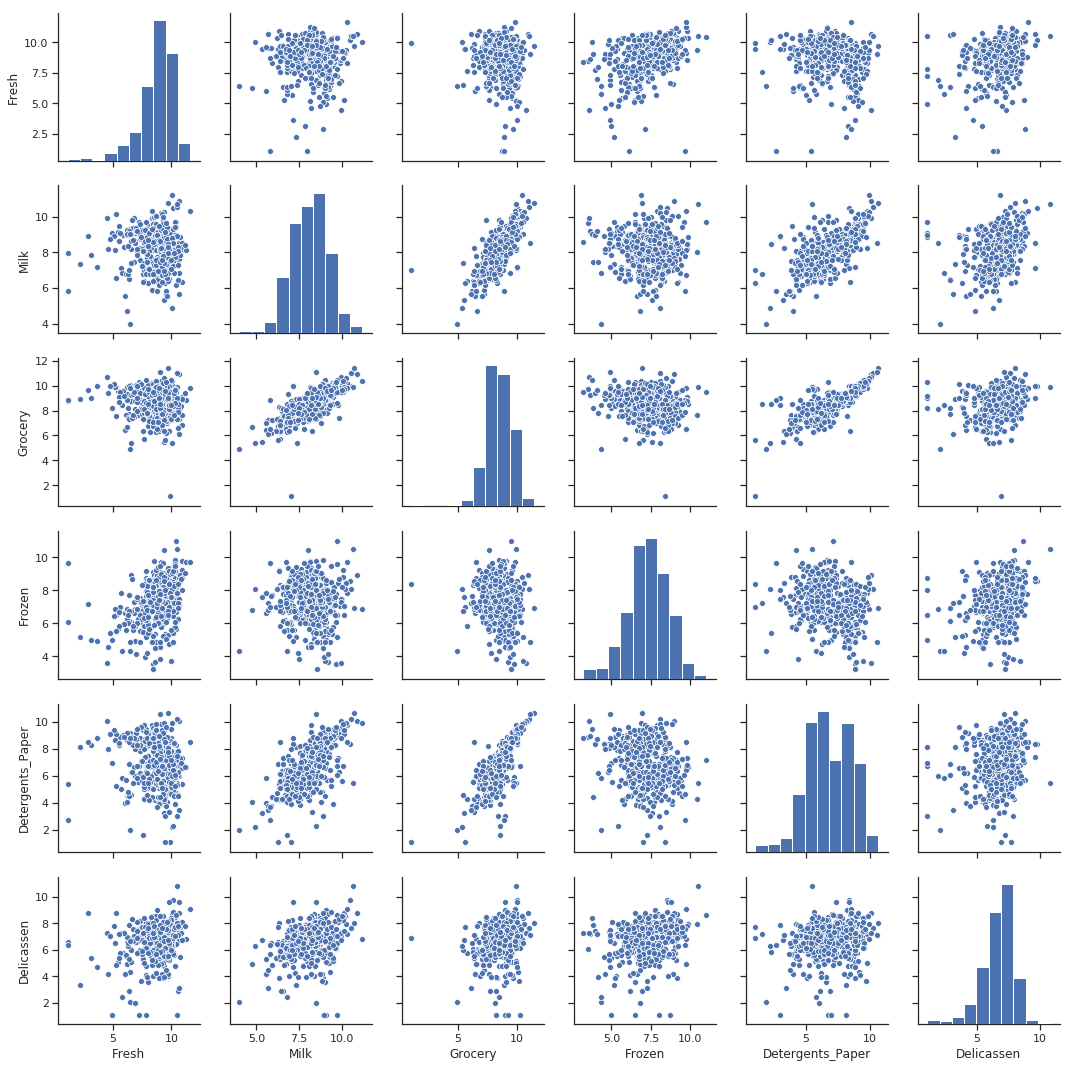

In [0]:
#Data Preprocessing: 1. Feature Scaling
#Scale the data using the natural logarithm
log_data = np.log(data)

#Scale the sample data using the natural logarithm
log_samples = pd.DataFrame(log_data.loc[indices], columns = data.keys()).reset_index(drop = True)

#Produce a scatter matrix for each pair of newly-transformed features
sns.pairplot(log_data)

In [0]:
#Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,10.350606,7.558517,8.404920,9.149316,7.775276,8.374246
1,8.743372,6.998510,7.590852,8.258422,6.411818,7.678789
2,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155


In [0]:
#Data Prepocessing: 2. Outlier Detection (Tukey's Method)
from collections import Counter
outliers_counter = Counter()

outliers_scores = None 

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    #Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    #Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    #Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    zeros = np.zeros(len(log_data[feature]))
    above = log_data[feature].values - Q3 - step
    below = log_data[feature].values - Q1 + step
    current_outliers_scores = np.array(np.maximum(zeros, above) - np.minimum(zeros, below)).reshape([-1,1])
    outliers_scores = current_outliers_scores if outliers_scores is None else np.hstack([outliers_scores, current_outliers_scores])
    
    #Display the outliers
    print("Data points considered outliers for the feature:",feature)
    current_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(current_outliers)
    outliers_counter.update(current_outliers.index.values)
    
# OPTIONAL: Select the indices for data points you wish to remove
min_outliers_count = 2
outliers = [x[0] for x in outliers_counter.items() if x[1] >= min_outliers_count]
print("Data points considered outlier for more than 1 feature:",outliers)

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature: Fresh


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature: Milk


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature: Grocery


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature: Frozen


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature: Detergents_Paper


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature: Delicassen


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Data points considered outlier for more than 1 feature: [65, 66, 128, 154, 75]


In [0]:
#Implement PCA (Principal Component Analysis)
from sklearn.decomposition import PCA

#Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=len(good_data.columns)).fit(good_data)

#Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

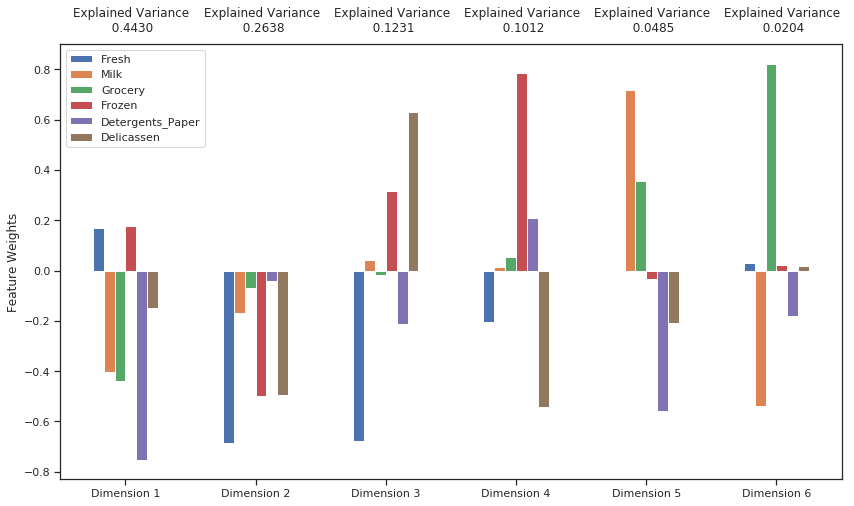

In [0]:
#Generate PCA results plot
import matplotlib.pyplot as plt
def pca_results(good_data, pca):
	'''
	Create a DataFrame of the PCA results
	Includes dimension feature weights and explained variance
	Visualizes the PCA results
	'''

	# Dimension indexing
	dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

	# PCA components
	components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
	components.index = dimensions

	# PCA explained variance
	ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
	variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
	variance_ratios.index = dimensions

	# Create a bar plot visualization
	fig, ax = plt.subplots(figsize = (14,8))

	# Plot the feature weights as a function of the components
	components.plot(ax = ax, kind = 'bar');
	ax.set_ylabel("Feature Weights")
	ax.set_xticklabels(dimensions, rotation=0)

	# Display the explained variance ratios
	for i, ev in enumerate(pca.explained_variance_ratio_):
		ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

	# Return a concatenated DataFrame
	return pd.concat([variance_ratios, components], axis = 1)


pca_results = pca_results(good_data, pca)

In [0]:
#Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-0.1419,-2.7722,0.3293,0.3928,-1.3904,0.2012
1,1.1404,-0.6710,0.9823,0.0603,-1.1423,0.0055
2,-3.9112,-0.2967,-1.4580,-3.3159,-0.3539,0.6634


In [0]:
#Dimensionality Reduction to only two dimensions
#Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

#Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

#Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

#Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [0]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-0.1419,-2.7722
1,1.1404,-0.6710
2,-3.9112,-0.2967


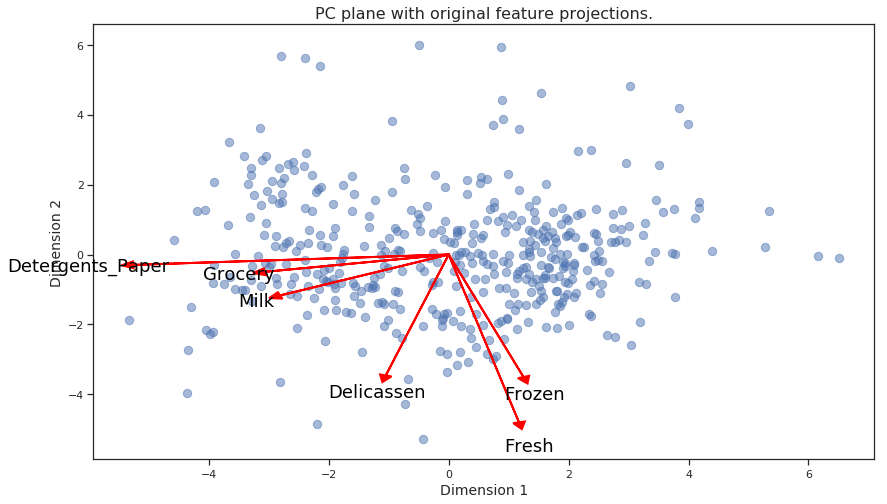

In [0]:
#Create a biplot (scatterplot where each data point is represented by its scores along the principal components)
def biplot(good_data, reduced_data, pca):
    '''
    Produce a biplot that shows a scatterplot of the reduced
    data and the projections of the original features.
    
    good_data: original data, before transformation.
               Needs to be a pandas dataframe with valid column names
    reduced_data: the reduced data (the first two dimensions are plotted)
    pca: pca object that contains the components_ attribute
    return: a matplotlib AxesSubplot object (for any additional customization)
    
    This procedure is inspired by the script:
    https://github.com/teddyroland/python-biplot
    '''

    fig, ax = plt.subplots(figsize = (14,8))
    # scatterplot of the reduced data    
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], 
        facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, good_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax
  

biplot(good_data, reduced_data, pca)

In [0]:
#Clustering with Gaussian Mixture Models (GMMs) and Silhouette scoring
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

def score_clustering(data, num_clusters):
    preds, _, _  = cluster(data, num_clusters)
    score = silhouette_score(data, preds)
    return score

def cluster(data, num_clusters):
    clusterer = GaussianMixture(n_components=num_clusters, covariance_type='full', random_state=40).fit(data)
    preds = clusterer.predict(data)
    centers = clusterer.means_
    sample_preds = clusterer.predict(pca_samples)
    return preds, centers, sample_preds
    
for num_clusters in range(2,10):
    score = score_clustering(reduced_data, num_clusters)
    print("num_clusters: {} - score: {}".format(num_clusters, score))

num_clusters: 2 - score: 0.4219168464626149
num_clusters: 3 - score: 0.37553218893793083
num_clusters: 4 - score: 0.24842117656657087
num_clusters: 5 - score: 0.28523681068367135
num_clusters: 6 - score: 0.31689180723258703
num_clusters: 7 - score: 0.333153846284612
num_clusters: 8 - score: 0.34290369721951186
num_clusters: 9 - score: 0.321888986722858


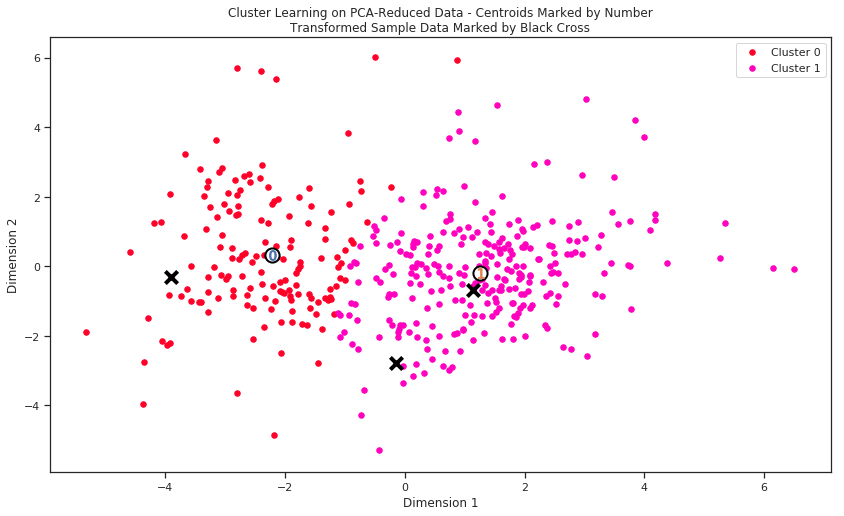

In [0]:
#Cluster Visualization 
#Display the results of the clustering from implementation
import matplotlib.cm as cm

#Use 2 Clusters
preds, centers, sample_preds = cluster(reduced_data, 2)

#Print function
def cluster_results(reduced_data, preds, centers, pca_samples):
	'''
	Visualizes the PCA-reduced cluster data in two dimensions
	Adds cues for cluster centers and student-selected sample data
	'''

	predictions = pd.DataFrame(preds, columns = ['Cluster'])
	plot_data = pd.concat([predictions, reduced_data], axis = 1)

	#Generate the cluster plot
	fig, ax = plt.subplots(figsize = (14,8))

	#Color map
	cmap = cm.get_cmap('gist_rainbow')

	#Color the points based on assigned cluster
	for i, cluster in plot_data.groupby('Cluster'):   
	    cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
	                 color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

	#Plot centers with indicators
	for i, c in enumerate(centers):
	    ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
	               alpha = 1, linewidth = 2, marker = 'o', s=200);
	    ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

	#Plot transformed sample points 
	ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
	           s = 150, linewidth = 4, color = 'black', marker = 'x');

	#Set plot title
	ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross");


#Print
cluster_results(reduced_data, preds, centers, pca_samples)

In [0]:
#Data Recovery of centers (average customer of that segment)
#Appy inverse transformations, as data is currently reduced in dimension and scaled by log

#Inverse transform the centers
log_centers = pca.inverse_transform(centers)

#Exponentiate the centers
true_centers = np.exp(log_centers)

#Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,3552.0,7837.0,12219.0,870.0,4696.0,962.0
Segment 1,8953.0,2114.0,2765.0,2075.0,353.0,732.0


**Interpretation**

*Segment 0* has below-average spending on Fresh, Frozen and Delicatessen, average spending on Milk and Detergents_Paper, above-average spending on Grocery.This could be the profile of a **retail store**.

*Segment 1* below-average spending on Milk, Grocery, Detergents_Paper and Delicatessen, average spending on Fresh and Frozen. This could be the profile of a **restaurants** selling fresh and frozen food.

In [0]:
#Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


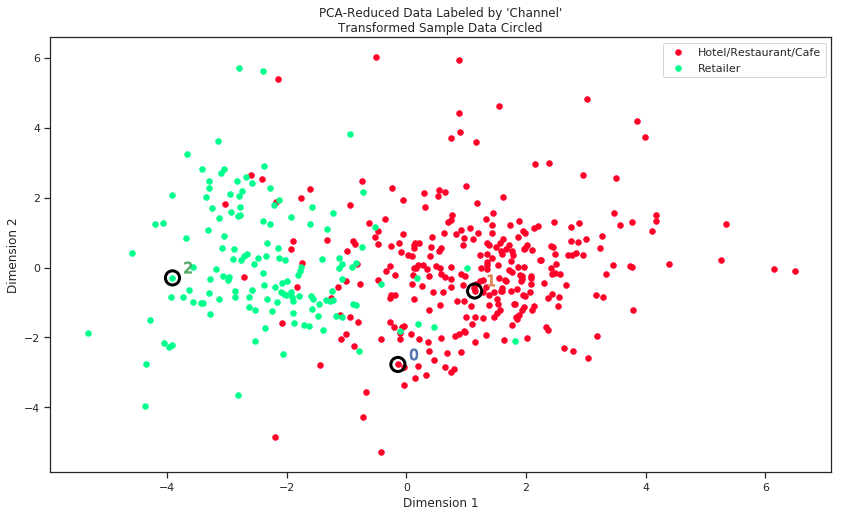

In [0]:
#Now reintroducing the 'Channel' feature to the dataset ('HoReCa' for Hotel/Restaurant/Cafe or 'Retail')

#Visualizing Underlying Distributions
def channel_results(reduced_data, outliers, pca_samples):
	'''
	Visualizes the PCA-reduced cluster data in two dimensions using the full dataset
	Data is labeled by "Channel" and cues added for selected sample data
	'''

	# Check that the dataset is loadable
	try:
	    full_data = pd.read_csv('Wholesale customers data.csv')
	except:
	    print("Dataset could not be loaded. Is the file missing?")
	    return False

	# Create the Channel DataFrame
	channel = pd.DataFrame(full_data['Channel'], columns = ['Channel'])
	channel = channel.drop(channel.index[outliers]).reset_index(drop = True)
	labeled = pd.concat([reduced_data, channel], axis = 1)
	
	# Generate the cluster plot
	fig, ax = plt.subplots(figsize = (14,8))

	# Color map
	cmap = cm.get_cmap('gist_rainbow')

	# Color the points based on assigned Channel
	labels = ['Hotel/Restaurant/Cafe', 'Retailer']
	grouped = labeled.groupby('Channel')
	for i, channel in grouped:   
	    channel.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
	                 color = cmap((i-1)*1.0/2), label = labels[i-1], s=30);
	    
	# Plot transformed sample points   
	for i, sample in enumerate(pca_samples):
		ax.scatter(x = sample[0], y = sample[1], \
	           s = 200, linewidth = 3, color = 'black', marker = 'o', facecolors = 'none');
		ax.scatter(x = sample[0]+0.25, y = sample[1]+0.3, marker='$%d$'%(i), alpha = 1, s=125);

	# Set plot title
	ax.set_title("PCA-Reduced Data Labeled by 'Channel'\nTransformed Sample Data Circled");
  
  
channel_results(reduced_data, outliers, pca_samples)

**Interpretation**

Since 2 clusters are what the shilouette score recommended to use and, coincidentally, 2 clusters are what the creators of the dataset grouped the customers into. 

Regarding data points that could be classified as purely one or the other segment, there are some data points of this kind. Most data points though are somewhat ambiguous and do not clearly belong to one cluster or the other. There is considerable overlap in the true distribution.